In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d

In [2]:
data_1 = pd.read_csv("CSVFILES/fbi_data_p1.csv")
data_2 = pd.read_csv("CSVFILES/fbi_data_p2.csv")
data_3 = pd.read_csv("CSVFILES/fbi_data_p3.csv")
data_4 = pd.read_csv("CSVFILES/fbi_data_p4.csv")
data_5 = pd.read_csv("CSVFILES/fbi_data_p5.csv")
data_6 = pd.read_csv("CSVFILES/fbi_data_p6.csv")
data_pickle = pd.read_pickle("CSVFILES/fbi_offenders_by_age.pkl")
data_1.head()

,Unnamed: 0,ori,year,offense,state,cleared,actual
0,0,HI0010000,1990,aggravated-assault,HI,94,116
1,1,HI0010000,1990,arson,HI,9,37
2,2,HI0010000,1990,burglary,HI,267,1043
3,3,HI0010000,1990,homicide,HI,3,3
4,4,HI0010000,1990,human-trafficing,HI,0,0


In [3]:
merged_data = pd.concat([data_1, data_2,data_3,data_4,data_5,data_6], axis=0) 
#merged_data.to_csv("CSVFILES/merged_data_fbi.csv")
a = merged_data["state"].unique()
a

array(['HI', 'DE', 'PR', 'TX', 'MA', 'MD', 'ME', 'IA', 'ID', 'MI', 'UT',
       'MN', 'MO', 'IL', 'IN', 'MS', 'MT', 'AK', 'VA', 'AL', 'AR', 'VI',
       'NB', 'NC', 'ND', 'RI', 'AZ', 'NH', 'NJ', 'VT', 'NM', 'FL', 'NV',
       'WA', 'NY', 'SC', 'SD', 'WI', 'OH', 'GA', 'OK', 'CA', 'WV', 'WY',
       'OR', 'GM', 'KS', 'CO', 'KY', 'PA', 'CT', 'LA', 'TN', 'DC'],
      dtype=object)

In [4]:
# it is 54 becuase this also includes territories
states = []
for x in a:
    states.append(x)
print(len(states))
states.sort()
states

54


['AK',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'GM',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NB',
 'NC',
 'ND',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'PR',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'VI',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY']

In [5]:
#merged_data.groupby("state")["cleared"].sum()
aaa = merged_data.groupby("state")["actual"].sum()
abc = pd.DataFrame(aaa)
abc

,actual
state,
AK,1268859
AL,10255189
AR,6389491
AZ,15848349
CA,80781480
CO,9675998
CT,6231695
DC,2610806
DE,1812316


In [6]:
new_frame_df = pd.DataFrame({"States":states,"Actual":abc["actual"]})
new_frame_df.reset_index(inplace = True)
del new_frame_df["state"]
new_frame_df.to_csv("CSVFILES/state_actual.csv")
merged_data["state"].unique()

array(['HI', 'DE', 'PR', 'TX', 'MA', 'MD', 'ME', 'IA', 'ID', 'MI', 'UT',
       'MN', 'MO', 'IL', 'IN', 'MS', 'MT', 'AK', 'VA', 'AL', 'AR', 'VI',
       'NB', 'NC', 'ND', 'RI', 'AZ', 'NH', 'NJ', 'VT', 'NM', 'FL', 'NV',
       'WA', 'NY', 'SC', 'SD', 'WI', 'OH', 'GA', 'OK', 'CA', 'WV', 'WY',
       'OR', 'GM', 'KS', 'CO', 'KY', 'PA', 'CT', 'LA', 'TN', 'DC'],
      dtype=object)

In [7]:
state_actual = pd.read_csv("CSVFILES/state_actual.csv")
ticker = 1
states_indexed = state_actual.set_index("States")
total = states_indexed["Actual"].sum()

while ticker == 1:
    choice = input("Choose a state: ")
    info = states_indexed.loc[choice,"Actual"]
    percent = round((info/total)*100,2)
    print(f"The state you chose {choice} makes up {percent}% of all the reported crime in the United States." )
    ticker = input("Would you like to go again? Enter 1 for yes and 0 for no.")
    


Choose a state: TX
The state you chose TX makes up 9.66% of all the reported crime in the United States.
Would you like to go again? Enter 1 for yes and 0 for no.0


In [8]:
# chose a mixture of small, medium, large sized states to compare percentage
texas = states_indexed.loc["TX","Actual"]
texas_percent = (texas/total)*100

cali = states_indexed.loc["CA","Actual"]
cali_percent = (cali/total)*100

utah = states_indexed.loc["UT","Actual"]
utah_percent = (utah/total)*100

alaska = states_indexed.loc["AK","Actual"]
alaska_percent = (alaska/total)*100

ri = states_indexed.loc["RI","Actual"]
ri_percent = (ri/total)*100

ny = states_indexed.loc["NY","Actual"]
ny_percent = (ny/total)*100

fl = states_indexed.loc["FL","Actual"]
fl_percent = (fl/total)*100

wy = states_indexed.loc["WY","Actual"]
wy_percent = (wy/total)*100

nd = states_indexed.loc["ND","Actual"]
nd_percent = (nd/total)*100

il = states_indexed.loc["IL","Actual"]
il_percent = (il/total)*100

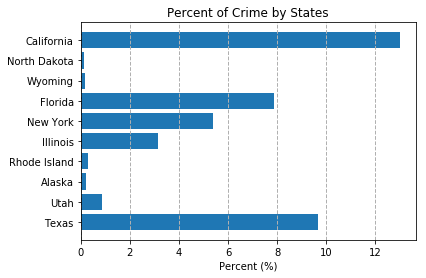

In [11]:
x_axis = ["Texas","Utah","Alaska","Rhode Island","Illinois", "New York", "Florida","Wyoming", "North Dakota","California"]
y_axis = [texas_percent, utah_percent, alaska_percent, ri_percent,il_percent, ny_percent, fl_percent, wy_percent,nd_percent,cali_percent]
ax = plt.barh(x_axis,y_axis, align='center')
plt.title("Percent of Crime by States")
plt.xlabel("Percent (%)")
plt.grid(axis = 'x', linestyle = '--', linewidth = 1)
plt.savefig("LearnPython/percent_of_crime_states")

In [22]:
# enter a state, show its crime data for only 2017 (our most recent year of data). 
year = input("Choose a year to look up (1990-2017): ")
state_yr = input("Now choose a state for the year chosen (ex: Texas = TX): ")
print("")
print(f"This is the crime data reported by the FBI for the state of {state_yr} in the year {year}.")
texas_data_df = merged_data.loc[(merged_data["year"]== int(year)) & (merged_data["state"]== str(state_yr)),:]
texas_data_df.groupby("offense")["actual"].sum()


Choose a year to look up (1990-2017): 2017
Now choose a state for the year chosen (ex: Texas = TX): CA

This is the crime data reported by the FBI for the state of CA in the year 2017.


offense
aggravated-assault     104285
arson                    8647
burglary               176653
homicide                 1830
human-trafficing            0
larceny                641900
motor-vehicle-theft    168357
property-crime         986910
rape                    14719
rape-legacy                 0
robbery                 56611
violent-crime          177445
Name: actual, dtype: int64

In [46]:
tx_2017 = merged_data.loc[(merged_data["state"] == "TX")& (merged_data["year"]== 2017),:]
tx_2017

#double checking to make sure output is correct

,Unnamed: 0,ori,year,offense,state,cleared,actual
19320,19320,TX2390000,2017,aggravated-assault,TX,12,21
19321,19321,TX2390000,2017,arson,TX,0,1
19322,19322,TX2390000,2017,burglary,TX,6,67
19323,19323,TX2390000,2017,homicide,TX,0,1
19324,19324,TX2390000,2017,human-trafficing,TX,0,0
19325,19325,TX2390000,2017,larceny,TX,5,75
19326,19326,TX2390000,2017,motor-vehicle-theft,TX,2,13
19327,19327,TX2390000,2017,property-crime,TX,13,155
19328,19328,TX2390000,2017,rape,TX,2,3
19329,19329,TX2390000,2017,rape-legacy,TX,0,0


In [47]:
print(len(merged_data["ori"]))


5375460


In [ ]:
# disregard this, just a mess around 
fig = plt.figure()
ax1 = fig.add_subplot(111,projection = '3d')
x3 = [1,2,3,4,5,6,7,8,9]
z3 = np.zeros(9)
dx = np.ones(9)
dy = np.ones(9)
dz = [1,2,3,4,5,6,7,8,9]
ax1.bar3d(x3,y_axis,z3,dx,dy,dz)

In [12]:
merged_data


,Unnamed: 0,ori,year,offense,state,cleared,actual
0,0,HI0010000,1990,aggravated-assault,HI,94,116
1,1,HI0010000,1990,arson,HI,9,37
2,2,HI0010000,1990,burglary,HI,267,1043
3,3,HI0010000,1990,homicide,HI,3,3
4,4,HI0010000,1990,human-trafficing,HI,0,0
5,5,HI0010000,1990,larceny,HI,613,2580
6,6,HI0010000,1990,motor-vehicle-theft,HI,64,274
7,7,HI0010000,1990,property-crime,HI,944,3897
8,8,HI0010000,1990,rape,HI,0,0
9,9,HI0010000,1990,rape-legacy,HI,6,20
